In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
#Model evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import recall_score, accuracy_score, precision_score,  f1_score
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [13]:

from google.colab import files
uploaded = files.upload()

Saving medium_data.csv to medium_data.csv


In [17]:
df = pd.read_csv('medium_data.csv')
df.head(5)

,id,url,title,subtitle,image,claps,responses,reading_time,publication,date
0,1,https://towardsdatascience.com/a-beginners-gui...,A Beginner’s Guide to Word Embedding with Gens...,NaN,1.png,850,8,8,Towards Data Science,2019-05-30
1,2,https://towardsdatascience.com/hands-on-graph-...,Hands-on Graph Neural Networks with PyTorch & ...,NaN,2.png,1100,11,9,Towards Data Science,2019-05-30
2,3,https://towardsdatascience.com/how-to-use-ggpl...,How to Use ggplot2 in Python,A Grammar of Graphics for Python,3.png,767,1,5,Towards Data Science,2019-05-30
3,4,https://towardsdatascience.com/databricks-how-...,Databricks: How to Save Files in CSV on Your L...,When I work on Python projects dealing…,4.jpeg,354,0,4,Towards Data Science,2019-05-30
4,5,https://towardsdatascience.com/a-step-by-step-...,A Step-by-Step Implementation of Gradient Desc...,One example of building neural…,5.jpeg,211,3,4,Towards Data Science,2019-05-30


In [18]:
df.shape

(6508, 10)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6508 entries, 0 to 6507
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            6508 non-null   int64 
 1   url           6508 non-null   object
 2   title         6508 non-null   object
 3   subtitle      3479 non-null   object
 4   image         6361 non-null   object
 5   claps         6508 non-null   int64 
 6   responses     6508 non-null   object
 7   reading_time  6508 non-null   int64 
 8   publication   6508 non-null   object
 9   date          6508 non-null   object
dtypes: int64(3), object(7)
memory usage: 508.6+ KB


In [20]:
df.isnull().sum()

id                 0
url                0
title              0
subtitle        3029
image            147
claps              0
responses          0
reading_time       0
publication        0
date               0
dtype: int64

In [21]:
df.describe()

,id,claps,reading_time
count,6508.000000,6508.000000,6508.000000
mean,3254.500000,311.076060,6.134911
std,1878.842108,950.789896,3.231918
min,1.000000,0.000000,0.000000
25%,1627.750000,54.000000,4.000000
50%,3254.500000,115.000000,5.000000
75%,4881.250000,268.250000,7.000000
max,6508.000000,38000.000000,55.000000


In [26]:
df['date'] = df['date'].astype('category')
df['date'] = df['date'].cat.codes
df['date'].value_counts()

40    197
23    193
37    186
41    184
39    180
36    178
42    177
46    176
19    173
26    172
24    171
32    170
20    168
33    167
22    167
18    165
49    165
30    165
28    164
35    159
44    159
47    154
43    149
38    137
25    137
4     127
8     124
21    120
48    119
45    118
2     115
7     112
27    107
29    106
31    104
16     99
5      90
12     89
14     88
10     86
17     85
15     83
1      76
34     74
0      68
13     65
6      64
3      60
9      60
11     56
Name: date, dtype: int64

In [27]:
df = df.drop(columns =['date'])
df

,id,url,title,subtitle,image,claps,responses,reading_time,publication
0,1,https://towardsdatascience.com/a-beginners-gui...,A Beginner’s Guide to Word Embedding with Gens...,NaN,1.png,850,8,8,Towards Data Science
1,2,https://towardsdatascience.com/hands-on-graph-...,Hands-on Graph Neural Networks with PyTorch & ...,NaN,2.png,1100,11,9,Towards Data Science
2,3,https://towardsdatascience.com/how-to-use-ggpl...,How to Use ggplot2 in Python,A Grammar of Graphics for Python,3.png,767,1,5,Towards Data Science
3,4,https://towardsdatascience.com/databricks-how-...,Databricks: How to Save Files in CSV on Your L...,When I work on Python projects dealing…,4.jpeg,354,0,4,Towards Data Science
4,5,https://towardsdatascience.com/a-step-by-step-...,A Step-by-Step Implementation of Gradient Desc...,One example of building neural…,5.jpeg,211,3,4,Towards Data Science
...,...,...,...,...,...,...,...,...,...
6503,6504,https://medium.com/better-marketing/we-vs-i-ho...,“We” vs “I” — How Should You Talk About Yourse...,Basic copywriting choices with a big…,6504.jpg,661,6,6,Better Marketing
6504,6505,https://medium.com/better-marketing/how-donald...,How Donald Trump Markets Himself,Lessons from who might be the most popular bra...,6505.jpeg,189,1,5,Better Marketing
6505,6506,https://medium.com/better-marketing/content-an...,Content and Marketing Beyond Mass Consumption,How to acquire customers without wasting money...,6506.jpg,207,1,8,Better Marketing
6506,6507,https://medium.com/better-marketing/5-question...,5 Questions All Copywriters Should Ask Clients...,Save time and effort by…,6507.jpg,253,2,5,Better Marketing


In [34]:
features= df.drop(columns ='date')
features.head(2)

SyntaxError: ignored

In [37]:
target = df('url')
target.tail(5)

TypeError: ignored

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.2, random_state = 1)

In [24]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape


NameError: ignored

In [25]:
import imblearn
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 1)
x_train_balanced, y_balanced = smote.fit_resample(x_train, y_train)
x_train_balanced, y_balanced

NameError: ignored

In [38]:
y_balanced.value_counts()

NameError: ignored

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [40]:
normalised_train = scaler.fit_transform(x_train_balanced)
normalised_train= pd.DataFrame(normalised_train, columns = x_train_balanced.columns)


NameError: ignored

In [41]:
normalised_train


NameError: ignored

In [42]:
x_test = x_test.reset_index(drop = True)
normalised_test = scaler.transform(x_test)
normalised_test = pd.DataFrame(normalised_test, columns = x_test.columns)

NameError: ignored

In [43]:
normalised_test

NameError: ignored

In [44]:
from sklearn.ensemble import ExtraTreesClassifier

In [45]:
def fit_and_score(models, normalised_train, normalised_test, y_balanced, y_test):
  """
  fits and evaluates given ml models
  models : a dictionary of different scikit learn machine learning models
  normalised_train : training data(no labels)
  normalised_test : testing data(no labels)
  y_balanced : training labels
  y_test : testing labels
  """
  #setting random seed for reproducibility so we get same no anytime we run a new code
  np.random.seed(42)

  #Making a dictionary to keep model scores
  model_scores = {}

  #Looping through models
  for name, model in models.items():

  #fitting the model to the data
      model.fit(normalised_train, y_balanced)
  #evaluating the model and appending its score to model_scores
      model_scores[name] = model.score(normalised_test, y_test)
  return model_scores


In [46]:
model_scores = fit_and_score(models = models,
                     normalised_train = x_train,
                     normalised_test = x_test,
                      y_balanced = y_train,
                     y_test = y_test)
model_scores

NameError: ignored

In [47]:
Model = ExtraTreesClassifier()

In [48]:

estimator = ExtraTreesClassifier(random_state=1)
param_grid = {
    'n_estimators': [100, 300, 500, 1000],
    'min_samples_split': [2, 5, 7],
    'min_samples_leaf': [4, 6, 8],
    'max_features': ['auto', None, 'log2']
}

In [49]:
random_search = RandomizedSearchCV(estimator, param_grid, cv=5, n_iter=10, scoring='accuracy', n_jobs=-1, verbose=1, random_state=1)

In [50]:
random_search.fit(x_train, y_train)


NameError: ignored

In [51]:
best_params = random_search.best_params_

AttributeError: ignored

In [52]:
print(best_params)

NameError: ignored

In [53]:
random_search.score(x_test,y_test)

NameError: ignored

In [54]:
clf= ExtraTreesClassifier(n_estimators=1000, min_samples_split=2, min_samples_leaf=8, max_features=None)

In [55]:
clf.fit(x_train, y_train)

NameError: ignored

In [56]:
importances = clf.feature_importances_


NotFittedError: ignored

In [57]:
importance_normalized = np.std([tree.feature_importances_ for tree in

                                        extra_tree_forest.estimators_],

                                        axis = 0

SyntaxError: ignored

In [58]:
impt_normalized = np.std([tree.feature_importances_ for tree in clf.estimators_], axis = 0)

AttributeError: ignored

In [59]:
plt.bar(features.columns, impt_normalized)

plt.xlabel('Feature Labels')

plt.ylabel('Feature Importances')

plt.title('Comparison of different Feature Importances')
plt.show()

NameError: ignored

In [60]:
importances

NameError: ignored

In [61]:
indices = np.argsort(importances)[::-1]

NameError: ignored

In [62]:

indices

NameError: ignored

In [63]:
print("Feature ranking:")

Feature ranking:


In [64]:
print("Feature ranking:")

for f in range(features.shape[1]):
    print(f"{f + 1}. Feature {indices[f]}: {importances[indices[f]]}")

Feature ranking:


NameError: ignored

NameError: ignored

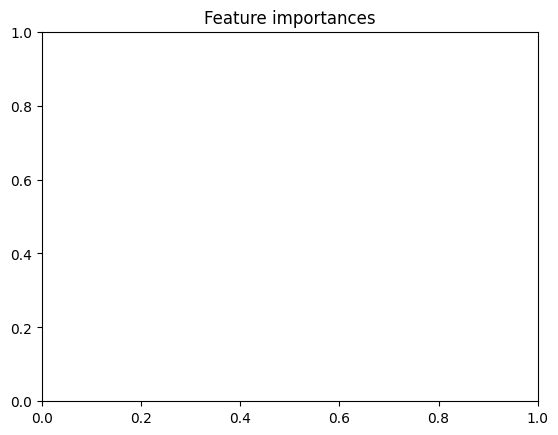

In [65]:
# Plot the feature importances
plt.figure()
plt.title("Feature importances")
plt.bar(range(features.shape[1]), importances[indices], color="r", align="center")
plt.xticks(range(features.shape[1]), indices)
plt.xlim([-1, features.shape[1]])
plt.show()

In [66]:
extra_tree_forest.fit(X, y)


# Computing the importance of each feature

feature_importance = extra_tree_forest.feature_importances_


# Normalizing the individual importances

feature_importance_normalized = np.std([tree.feature_importances_ for tree in

                                        extra_tree_forest.estimators_],

                                        axis = 0)
Step 4: Visualizing and Comparing the results
# Plotting a Bar Graph to compare the models
plt.bar(X.columns, feature_importance_normalized)

plt.xlabel('Feature Labels')

plt.ylabel('Feature Importances')

plt.title('Comparison of different Feature Importances')
plt.show()

SyntaxError: ignored